## Linear Regression

### Exploring the data

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
from sklearn.datasets import load_boston

In [3]:
## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     boston = load_boston()

In [4]:
# Extracting the data in a dataframe for readability
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) 

Based on the information below we can tell that there no non-empty cells, thus, we  don't need to pre-process the data to fix any empty cells

In [5]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df_boston.head()  #prints out the first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Below we label the targer variable (y) as 'PRICE' because this is what we will be predicting in our models later

In [7]:
df_boston['PRICE'] = boston.target   

In [8]:
df_boston.head()  #checking the dataset after adding the target label

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Below we can 

In [9]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
#histograms of the dataset?
#Do we take off the features that don't correlate with the target?

### Splitting Data: Training and Test Sets

In [9]:
X = df_boston.drop('PRICE', axis = 'columns') #independent variables
y = df_boston['PRICE']  #dependent variable

Below we appending ones to the matrix of independendent variable, because the 1s are the bias feature of 
each observation.

In [11]:
X = np.append(arr = np.ones([X.shape[0], 1]).astype(int), values = X, axis= 1)
X.shape

(506, 14)

In [12]:
from sklearn.model_selection import KFold
kfold_value = 5
kfold = KFold(n_splits = kfold_value)

### *Closed form solution*

Closed form solution image

In [13]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [15]:
mse_train_arr = []    # An array that stores the value of training set mse of the 5 iterations of the kfolds
mse_test_arr = []     # An array that stores the value of testing set mse of the 5 iterations of the kfolds
for train, test in kfold.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    theta = normal_equation(X_train, y_train)
    
    y_train_pred = np.dot(X_train,theta) 
    mse_train = sum((y_train_pred - y_train)**2)/len(y_train)
    mse_train_arr.append(mse_train)
    
    y_test_pred = np.dot(X_test,theta) 
    mse_test = sum((y_test_pred - y_test)**2)/len(y_test)
    mse_test_arr.append(mse_test)


avg_train = np.mean(mse_train_arr)
avg_test = np.mean(mse_test_arr)
print("Closed Form MSE Values")
print("Average training RMSE:", avg_train)
print("Average testing RMSE:", avg_test)

Closed Form MSE Values
Average training RMSE: 20.735084629886188
Average testing RMSE: 37.131807467699446


### *Ridge Regression*

Insert Ridge Regression closed form picture and explanation

In [16]:
def ridge_regression_theta(X, y, alpha):
    I = np.identity(X.shape[1])
    I[0][0] = 0  
    theta = np.linalg.inv(X.T.dot(X) + alpha*I).dot(X.T).dot(y)
    return theta

The function below is used by 2 models: Ridge Regression Closed Form and Polynomial Feature Model

In [29]:
def ridge_regression_model(X, y, alpha, kfold_value):
    
    mse_train_arr = []
    mse_test_arr = []
    
    kfold = KFold(n_splits = kfold_value)
    for train, test in kfold.split(X):
            X_train, X_test = X[train], X[test]
            y_train, y_test = y[train], y[test]

            theta = ridge_regression_theta(X_train, y_train, alpha)

            y_train_pred = np.dot(X_train,theta) 
            mse_train = sum((y_train_pred - y_train)**2)/len(y_train)
            mse_train_arr.append(mse_train)

            y_test_pred = np.dot(X_test,theta) 
            mse_test = sum((y_test_pred - y_test)**2)/len(y_test)
            mse_test_arr.append(mse_test)
        
    return [np.mean(mse_train_arr),np.mean(mse_test_arr)]

In [30]:
alphas = np.logspace(1,7,num=13)

print("Ridge Regression Closed Form MSE Values", "\n")

kfold_value = 5
for i in range(len(alphas)): 
    mse = ridge_regression_model(X, y, alphas[i], kfold_value)
    print("For alpha =", alphas[i], "MSE train =", mse[0], "and MSE test =", mse[1])

Ridge Regression Closed Form MSE Values 

For alpha = 10.0 MSE train = 21.699319443478004 and MSE test = 33.395224459034395
For alpha = 31.622776601683793 MSE train = 22.19225021187546 and MSE test = 31.57382058814887
For alpha = 100.0 MSE train = 23.34820908395863 and MSE test = 29.905701947540802
For alpha = 316.22776601683796 MSE train = 25.309808337851436 and MSE test = 30.253355902308734
For alpha = 1000.0 MSE train = 27.82703548665637 and MSE test = 32.82804756980864
For alpha = 3162.2776601683795 MSE train = 31.45192470125168 and MSE test = 37.42355459786758
For alpha = 10000.0 MSE train = 37.67212746663752 and MSE test = 44.56687581846328
For alpha = 31622.776601683792 MSE train = 46.63290059467057 and MSE test = 53.897035588722815
For alpha = 100000.0 MSE train = 54.00931508434603 and MSE test = 61.180750580993404
For alpha = 316227.7660168379 MSE train = 58.30620006957099 and MSE test = 65.43563695815021
For alpha = 1000000.0 MSE train = 61.06438623961534 and MSE test = 68.43

The best value part

In [31]:
alpha = alphas[2]
rrmse = ridge_regression_model(X, y, alpha, kfold_value)
print("For alpha =", alpha, "MSE train =", rrmse[0], "and MSE test =", rrmse[1], "\n")

For alpha = 100.0 MSE train = 23.34820908395863 and MSE test = 29.905701947540802 



### *Polynomial Transformation*

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
X_new = df_boston.drop('PRICE', axis = 'columns') #independent variables - doing again to remove the bias term
polynomial_converter = PolynomialFeatures(degree=2)

Explain why we use polynomial feature here

In [40]:
poly_features = polynomial_converter.fit_transform(X_new)
poly_features.shape

(506, 105)

In [41]:
print("Polynomial Feature MSE Values", "\n")

poly_kfold_value = 10
for i in range(len(alphas)): 
    mse = ridge_regression_model(poly_features, y, alphas[i], poly_kfold_value)
    print("For alpha =", alphas[i], "MSE train =", mse[0], "and MSE test =", mse[1])

Polynomial Feature MSE Values 

For alpha = 10.0 MSE train = 6.588341672438196 and MSE test = 59.52508999693248
For alpha = 31.622776601683793 MSE train = 7.0171020195134926 and MSE test = 61.41648539887863
For alpha = 100.0 MSE train = 7.481646104649838 and MSE test = 65.55557807515319
For alpha = 316.22776601683796 MSE train = 7.914053076924398 and MSE test = 70.36686130408066
For alpha = 1000.0 MSE train = 8.387386360419693 and MSE test = 71.78516200647466
For alpha = 3162.2776601683795 MSE train = 8.953319864238308 and MSE test = 68.6881547247963
For alpha = 10000.0 MSE train = 9.51761867834638 and MSE test = 62.86987074418263
For alpha = 31622.776601683792 MSE train = 10.093060417761679 and MSE test = 55.99478374454818
For alpha = 100000.0 MSE train = 10.756066634404032 and MSE test = 48.22101981108817
For alpha = 316227.7660168379 MSE train = 11.502928036371761 and MSE test = 38.595444435393986
For alpha = 1000000.0 MSE train = 12.747525283996191 and MSE test = 30.068171402220532

In [43]:
alpha = 10000000
poly_mse = ridge_regression_model(poly_features, y, alpha, poly_kfold_value)
print("For alpha =", alpha, "MSE train =", poly_mse[0], "and MSE test =", poly_mse[1], "\n")

For alpha = 10000000 MSE train = 18.882249988234747 and MSE test = 34.53169330515347 



### *Gradient Descent*

Why do we scale the data in gradient descent?

In [44]:
from sklearn.preprocessing import StandardScaler
X_wb = df_boston.drop('PRICE', axis = 'columns') #independent variables - doing again to remove the bias term
X_wb = X_wb.to_numpy()

In [51]:
def gradient_descent_mse(X, y, lr, iters, model_name):
    mse_gd_train = []
    mse_gd_test = []

    for train, test in kfold.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
    
        #Initiliazing the parameters
        learning_rate = lr
        n_iterations = iters
    
        sc = StandardScaler()
        X_tr_transform = sc.fit_transform(X_train)
        X_tr_transform = np.append(arr = np.ones([X_tr_transform.shape[0], 1]).astype(int), values = X_tr_transform, axis= 1)
    
        theta = np.random.randn(X_tr_transform.shape[1]) 
        
        if model_name == "gradient descent":
            theta = gd_theta(X_tr_transform , y_train, theta, learning_rate, n_iterations)

        y_train_pred = np.dot(X_tr_transform,theta)
        mse_train = sum((y_train_pred - y_train)**2)/len(y_train)
        mse_gd_train.append(mse_train)
    
        X_t_transform = sc.transform(X_test)
        X_t_transform = np.append(arr = np.ones([X_t_transform.shape[0], 1]).astype(int), values = X_t_transform, axis= 1)

        y_test_pred = np.dot(X_t_transform,theta)
        mse_test = sum((y_test_pred - y_test)**2)/len(y_test)
        mse_gd_test.append(mse_test)
        
        return [np.mean(mse_gd_train), np.mean(mse_gd_test)]

In [45]:
#gradient descent function
def gd_theta(X, y, theta, lrate, n_iter):
    for i in range(n_iter):
        gradient = (2/len(X))*(X.T.dot(X.dot(theta) - y))
        theta = theta - lrate*gradient
    return theta

In [50]:
mse_gd_train = []
mse_gd_test = []


for train, test in kfold.split(X_wb):
    X_train, X_test = X_wb[train], X_wb[test]
    y_train, y_test = y[train], y[test]
    
    #Initiliazing the parameters
    learning_rate = 0.1
    n_iterations = 1000
    
    
    sc = StandardScaler()
    X_tr_transform = sc.fit_transform(X_train)
    X_tr_transform = np.append(arr = np.ones([X_tr_transform.shape[0], 1]).astype(int), values = X_tr_transform, axis= 1)
    
    initial_theta = np.random.randn(X_tr_transform.shape[1]) 
    theta = gd_theta(X_tr_transform , y_train, initial_theta, learning_rate, n_iterations)

    y_train_pred = np.dot(X_tr_transform,theta)
    mse_train = sum((y_train_pred - y_train)**2)/len(y_train)
    mse_gd_train.append(mse_train)
   
    
    X_t_transform = sc.transform(X_test)
    X_t_transform = np.append(arr = np.ones([X_t_transform.shape[0], 1]).astype(int), values = X_t_transform, axis= 1)

    y_test_pred = np.dot(X_t_transform,theta)
    mse_test = sum((y_test_pred - y_test)**2)/len(y_test)
    mse_gd_test.append(mse_test)

avg_train_gd = np.mean(mse_gd_train)
avg_test_gd = np.mean(mse_gd_test)
print("MSE train =", avg_train_gd, "and MSE test =", avg_test_gd, "\n")

MSE train = 20.735084633774466 and MSE test = 37.13202856074438 



In [52]:
learning_rate = 0.1
iterations = 1000
average_mse = gradient_descent_mse(X_wb, y, learning_rate, iterations, "gradient_descent")
print("MSE train =", average_mse[0], "and MSE test =", average_mse[1], "\n")

MSE train = 635.5108091361446 and MSE test = 606.8648775285443 



### *Gradient Descent with Ridge Regularization*

In [57]:
#ridge gradient
def ridge_gradient(X, y, y_pred, theta, alpha):
    ridge_gr = -(2/len(y)) * X.T.dot(y - y_pred) + alpha*theta    
    return ridge_gr

#gradient descent function with ridge gradient
def gd_ridge_theta(X, y, theta, lrate, n_iter):
    for i in range(n_iter):
        y_predicted = np.dot(X,theta)  
        gradient = ridge_gradient(X, y, y_predicted, theta, 0.0001)
        theta = theta - lrate*gradient
    return theta

In [58]:
mse_gdr_train = []
mse_gdr_test = []


for train, test in kfold.split(X_wb):
    X_train, X_test = X_wb[train], X_wb[test]
    y_train, y_test = y[train], y[test]
    
    #Initiliazing the parameters
    learning_rate = 0.1
    n_iterations = 1000
    
    sc = StandardScaler()
    X_tr_transform = sc.fit_transform(X_train)
    X_tr_transform = np.append(arr = np.ones([X_tr_transform.shape[0], 1]).astype(int), values = X_tr_transform, axis= 1)
    
    initial_theta = np.random.randn(X_tr_transform.shape[1]) 
    theta = gd_ridge_theta(X_tr_transform , y_train, initial_theta, learning_rate, n_iterations)

    y_train_pred = np.dot(X_tr_transform,theta)
    mse_train = sum((y_train_pred - y_train)**2)/len(y_train)
    mse_gdr_train.append(mse_train)
    
    
    X_t_transform = sc.transform(X_test)
    X_t_transform = np.append(arr = np.ones([X_t_transform.shape[0], 1]).astype(int), values = X_t_transform, axis= 1)

    y_test_pred = np.dot(X_t_transform,theta)
    mse_test = sum((y_test_pred - y_test)**2)/len(y_test)
    mse_gdr_test.append(mse_test)
    

avg_train_gdr = np.mean(mse_gdr_train)
avg_test_gdr = np.mean(mse_gdr_test)
print("MSE train =", avg_train_gdr, "and MSE test =", avg_test_gdr, "\n")

MSE train = 20.73508663057627 and MSE test = 37.12692284739741 



### *Gradient Descent with Lasso Regression*

In [59]:
#lasso gradient
def lasso_gradient(X, y, y_pred, theta):
    lasso_gr = -(2/len(y)) * X.T.dot(y - y_pred) + np.sign(theta)   
    return lasso_gr

#gradient descent function with lasso gradient
def gd_lasso_theta(X, y, theta, lrate, n_iter):
    for i in range(n_iter):
        y_predicted = np.dot(X,theta)    
        gradient = lasso_gradient(X, y, y_predicted, theta)
        theta = theta - lrate*gradient
    return theta

In [61]:
mse_gdl_train = []
mse_gdl_test = []


for train, test in kfold.split(X_wb):
    X_train, X_test = X_wb[train], X_wb[test]
    y_train, y_test = y[train], y[test]
    
    #Initiliazing the parameters
    learning_rate = 0.1
    n_iterations = 1000
    
    sc = StandardScaler()
    X_tr_transform = sc.fit_transform(X_train)
    X_tr_transform = np.append(arr = np.ones([X_tr_transform.shape[0], 1]).astype(int), values = X_tr_transform, axis= 1)
    
    initial_theta = np.random.randn(X_tr_transform.shape[1]) 
    theta = gd_lasso_theta(X_tr_transform , y_train, initial_theta, learning_rate, n_iterations)

    y_train_pred = np.dot(X_tr_transform,theta)
    mse_train = np.sqrt(sum((y_train_pred - y_train)**2)/len(y_train))
    mse_gdl_train.append(mse_train)
    
    X_t_transform = sc.transform(X_test)
    X_t_transform = np.append(arr = np.ones([X_t_transform.shape[0], 1]).astype(int), values = X_t_transform, axis= 1)

    y_test_pred = np.dot(X_t_transform,theta)
    mse_test = np.sqrt(sum((y_test_pred - y_test)**2)/len(y_test))
    mse_gdl_test.append(mse_test)
    

avg_train_gdl = np.mean(mse_gdr_train)
avg_test_gdl = np.mean(mse_gdr_test)
print("MSE train =", avg_train_gdr, "and MSE test =", avg_test_gdr, "\n")

MSE train = 20.73508663057627 and MSE test = 37.12692284739741 



### *Gradient Descent with Elastic Net*

In [ ]:

#ridge gradient
def elastic_gradient(X, y, y_pred, theta, alpha):
    elastic_gd = -(2/len(y)) * X.T.dot(y - y_pred) + np.sign(theta)   
    return elastic_gd

#gradient descent function with ridge gradient
def gd_elastic_theta(X, y, theta, lrate, n_iter):
    for i in range(n_iter):
        y_predicted = predict_y(X, theta
        gradient = elastic_gradient(X, y, y_predicted, theta, 0.0001)
        theta = theta - lrate*gradient
    return theta

In [ ]:
mse_gde_train = []
mse_gde_test = []


for train, test in kfold.split(X_wb):
    X_train, X_test = X_wb[train], X_wb[test]
    y_train, y_test = y[train], y[test]
    
    #Initiliazing the parameters
    learning_rate = 0.1
    n_iterations = 1000
    initial_theta = np.random.randn(X.shape[1]) 
    
    sc = StandardScaler()
    X_tr_transform = sc.fit_transform(X_train)
    X_tr_transform = np.append(arr = np.ones([X_tr_transform.shape[0], 1]).astype(int), values = X_tr_transform, axis= 1)
    
    theta = gd_theta(X_tr_transform , y_train, initial_theta, learning_rate, n_iterations)

    y_train_pred = predict_y(X_tr_transform ,theta)
    mse_train = np.sqrt(sum((y_train_pred - y_train)**2)/len(y_train))
    mse_gdl_train.append(mse_train)
    
    
    X_t_transform = sc.transform(X_test)
    X_t_transform = np.append(arr = np.ones([X_t_transform.shape[0], 1]).astype(int), values = X_t_transform, axis= 1)

    y_test_pred = predict_y(X_t_transform,theta)
    mse_test = np.sqrt(sum((y_test_pred - y_test)**2)/len(y_test))
    mse_gdl_test.append(mse_test)
    

avg_train_gdl = np.mean(mse_gdr_train)
avg_test_gdl = np.mean(mse_gdr_test)
print("MSE train =", avg_train_gdr, "and MSE test =", avg_test_gdr, "\n")

### Which model will I choose and why?

for all the models you've created so far, which one performed best and why did it perform best. What made it perform better than the others. What were it's parameters. Why would you choose it over the others.

In [ ]:
#What metric should we use to estimate the performance of our linear regression model?
 
#loss {train, validation, test}, accuracy {train, validation, test},
#confusion matrix, precision, recall, f1 score, etc. 
#Many to choose from but check the lab manual for specifics requested per question.


#find error - then square it - then mean 
#yhat = theta * independentvariabel
#np.matmul // np.dot(does the same thing upto 2 dimension)
#scale th data - preprocessing

## Logistic Regression 

### Exploring the data

In [150]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [151]:
data_cancer = load_breast_cancer()          #load the data 
df_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names) #extracting the data in a dataframe for readability

By looking at the shape of the dataframe we can tell that there are 569 rows and 30 columns, which means that there are 569 datapoints and 30 features in this dataset that are printed below

In [152]:
df_cancer.shape

(569, 30)

In [153]:
df_cancer['TARGET'] = data_cancer.target   

In [154]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [155]:
X_cancer = df_cancer.drop('TARGET', axis = 'columns') #independent variables
y_cancer = df_cancer['TARGET']  #dependent variable

print(X_cancer.shape)
print(y_cancer.shape)

(569, 30)
(569,)


### Train Test Split & Scaling

In [156]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 10, test_size = 0.2)
y_test = y_test.to_numpy()

Why do we scale the data?

In [157]:
# Scaling the training data
sc_cancer = StandardScaler()
X_train_tr = sc_cancer.fit_transform(X_train)
X_train_tr = np.append(arr = np.ones([X_train_tr.shape[0], 1]).astype(int), values = X_train_tr, axis= 1)
print(X_train_tr.shape)
print(y_train.shape)

(455, 31)
(455,)


In [158]:
# Scaling the testing data
X_test_tr = sc_cancer.transform(X_test)
X_test_tr = np.append(arr = np.ones([X_test_tr.shape[0], 1]).astype(int), values = X_test_tr, axis= 1)
print(X_test_tr.shape)
print(y_test.shape)

(114, 31)
(114,)


### Implementation

Use gradient ascent to find the weights for the logistic regression problem and apply it to the dataset.

logistic - likelihood (gradient ascent), negative likelihood (gradient descent)

The Sigmoid Function is an activation function that maps any real value to 0 and 1

In [159]:
def sigmoid_function(y_pred):
    sigmoid = 1/(1+np.exp(-y_pred))
    return sigmoid

The cost function we use in logistic regression is called log loss (different from mse). 
Because we need to think about the probability
and explain how the function works

In [160]:
def log_likelihood(theta, X , y):                                                
    y_probability = sigmoid_function(np.dot(X,theta))         # get the probabilites of y
    prob_one_log = y * np.log(y_probability)                  # the cost of y_pred when y = 1
    prob_zero_log = (1 - y) * np.log(1 - y_probability)       # the cost of y_pred when y = 0
    log_likelihood = prob_one_log + prob_zero_log
    return np.mean(log_likelihood)

What does the gradient descent function do?

In [212]:
def logistic_gradient_descent(X, y, theta):
    y_probability = sigmoid_function(np.dot(X,theta))
    gradient = (1/len(X)) * np.dot(X.T, (y_probability - y))
    return gradient

def logistic_regression_theta(learning_rate, iterations, X_train, y_train, X_test, y_test):
    theta = np.random.randn(X_train.shape[1])
    log_likelihood_train = []
    log_likelihood_test = []

    for i in range(iterations):
        gradient = logistic_gradient_descent(X_train, y_train, theta)   # call the gradient function
        theta = theta - learning_rate*gradient
        
        likelihood_train = 0
        likelihood_test = 0
        if i%100 == 0:
            likelihood_train = log_likelihood(theta, X_train, y_train)
            log_likelihood_train.append(likelihood_train)
            
            likelihood_test = log_likelihood(theta, X_test, y_test)
            log_likelihood_test.append(likelihood_test)
            
            
    return [theta, log_likelihood_train, log_likelihood_test]

In [213]:
#ignore warning
np.seterr(divide = 'ignore')

#initial hyperparameters
threshold = 0.5                                # if the value goes above this then class 1, if below then class 2
lr = 0.5                                       # learning rate
n_iters = 5000                                 # number of iterations

model_theta = logistic_regression_theta(lr, n_iters, X_train_tr, y_train, X_test_tr, y_test)[0]   #send the X_train and y_train
print("Theta value (w):", model_theta)

Theta value (w): [-0.95852095  0.13580986 -0.76184019  0.13622924  1.34205146  0.09038791
  1.07303503 -2.18053373 -2.65654381  1.21194498 -0.07319615 -4.58539635
  0.79146713 -1.10420095 -2.72627967 -0.58252048  1.97832483  0.0611449
 -2.28866638  2.34671164  3.06160515 -2.40734645 -2.42832829 -1.89725218
 -1.67414546 -0.11287355  2.03369081 -2.70501443 -0.84695146 -1.95905427
 -2.45262293]


In [214]:
def predict_y_value(X, theta, threshold):
    y_probability = sigmoid_function(np.dot(X,theta))
    y_predicted = [1 if i > 0.5 else 0 for i in y_probability]
    return y_predicted

predicted_values = predict_y_value(X_test_tr, model_theta, threshold)

[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]


In [221]:
# Confusion Matrix:
def confusion_matrix(y, y_pred):
    tp = tn = fp = fn = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:   #true values
            if y_pred[i] == 1:
                tp += 1
            else:
                tn += 1
        else: 
            if y_pred[i] == 1:
                fp += 1
            else: 
                fn += 1
            
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f_measure = 2*precision*recall/(precision + recall)
                
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
     
    return [[tn, fp], [fn, tp]]

cf = np.array(confusion_matrix(y_test, predicted_values))
print("Confusion Matrix:\n", cf)

Precision: 0.9594594594594594
Recall: 0.9466666666666667
F-Measure: 0.9530201342281879
Confusion Matrix:
 [[36  3]
 [ 4 71]]


In [216]:
def plot_graph(title, n_iters, data_points):
    size = int(n_iters/100)
    x_axis = [i*100 for i in range(1, size + 1)]
    plt.figure(figsize=(14,6))
    plt.title(title)
    plt.xlabel('epoch iteration')
    plt.ylabel('log-likehood value')
    plt.xticks(x_axis)
    plt.plot(x_axis, data_points, marker='o')
    plt.tight_layout()

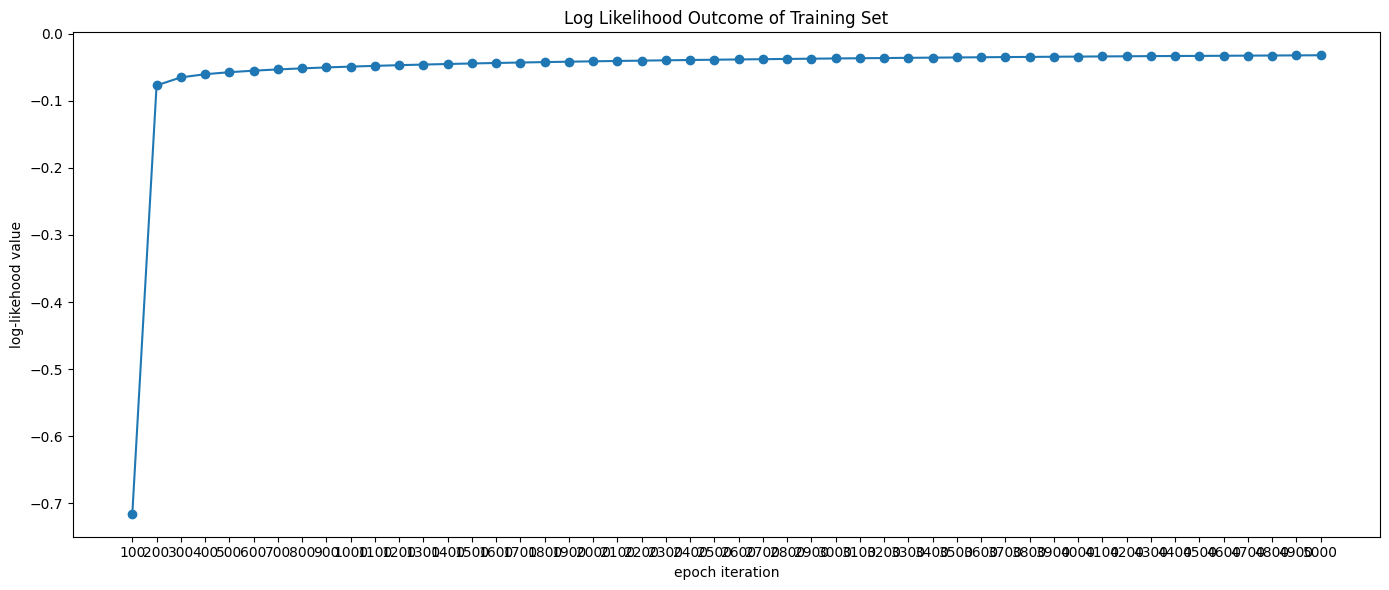

In [217]:
log_likelihood_train = logistic_regression_theta(lr, n_iters, X_train_tr, y_train, X_test_tr, y_test)[1] 
plot_graph('Log Likelihood Outcome of Training Set', n_iters, log_likelihood_train)

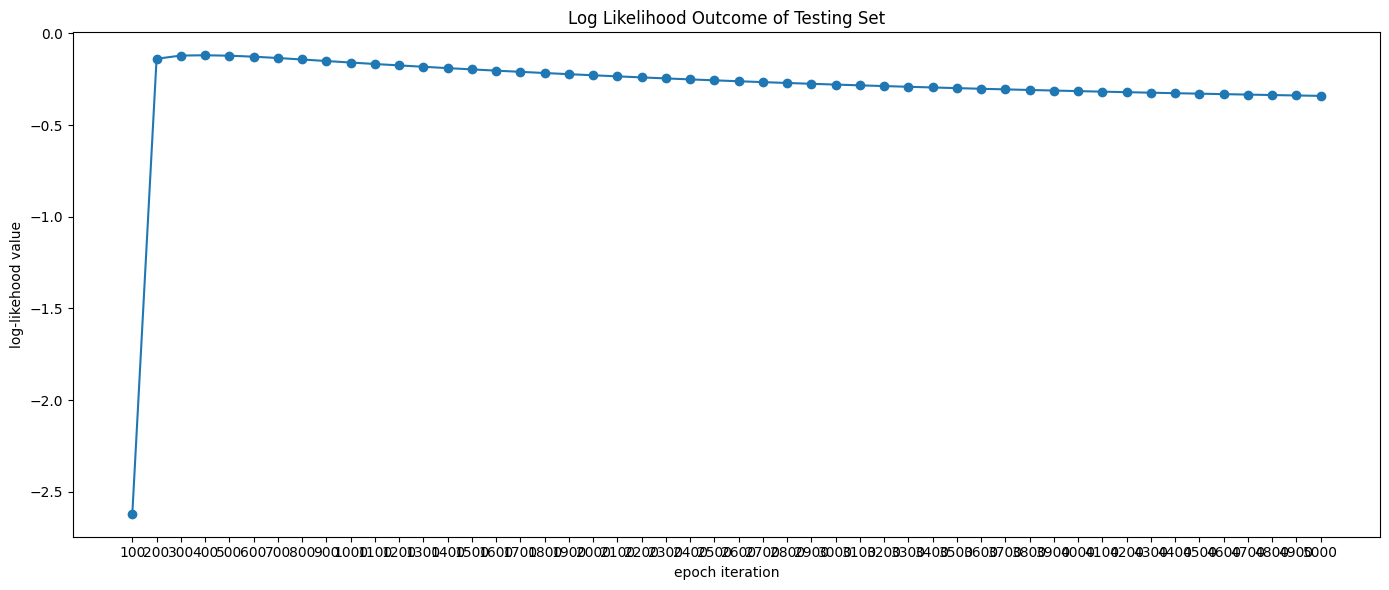

In [218]:
log_likelihood_test = logistic_regression_theta(lr, n_iters, X_train_tr, y_train, X_test_tr, y_test)[2] 
plot_graph('Log Likelihood Outcome of Testing Set', n_iters, log_likelihood_test)

In [ ]:
# 7. Use the test set as a validation set and see if you can find a better setting of the hyperparameters. 
# Report the best values you found.
